# Figure Notebook for "AuroraX, aurorax-api and aurorax-asilib: a user-friendly auroral all-sky imager analysis framework"

In [1]:
from datetime import datetime, timedelta
import string

import matplotlib.pyplot as plt
from matplotlib import dates
from matplotlib.gridspec import GridSpec
import numpy as np
import asilib

print(f'asilib version: {asilib.__version__}')

asilib version: 0.12.1


# Figure 2

Made directory at /media/mike/692d5b55-e101-4c9f-a338-50bfdc97761e/asilib-data/themis/skymap/rank
Made directory at /media/mike/692d5b55-e101-4c9f-a338-50bfdc97761e/asilib-data/rego/skymap/rank


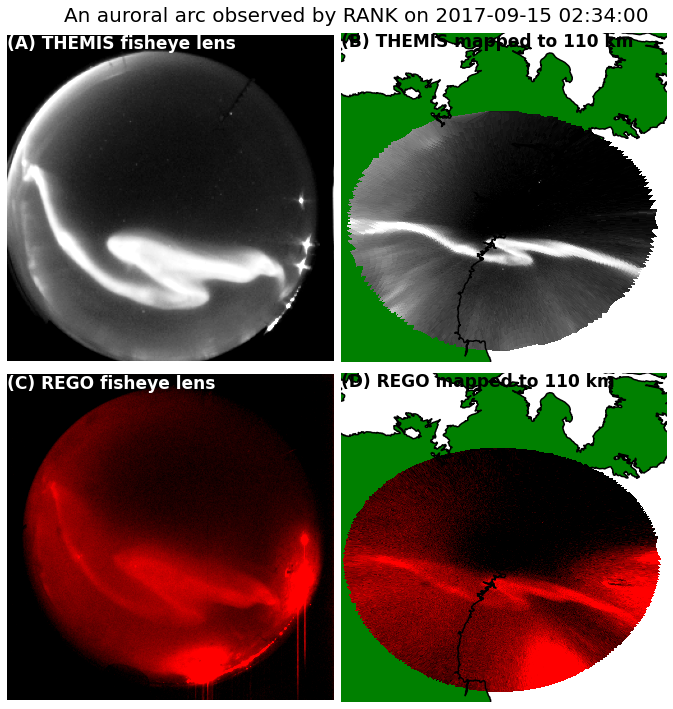

In [9]:
location_code = 'RANK'
time = datetime(2017, 9, 15, 2, 34, 0)
map_alt_km = 110
fontsize=17

lon_bounds = (-102, -82)
lat_bounds = (58, 70)

fig, ax = plt.subplots(2, 2, figsize=(10, 10))
asilib.make_map(ax=ax[0, 1], lon_bounds=lon_bounds, lat_bounds=lat_bounds)
asilib.make_map(ax=ax[1, 1], lon_bounds=lon_bounds, lat_bounds=lat_bounds)

ax[0, 0].axis('off')
ax[1, 0].axis('off')
ax[0, 1].axis('off')
ax[1, 1].axis('off')

asilib.plot_fisheye('THEMIS', location_code, time, ax=ax[0, 0], label=False)
asilib.plot_fisheye('REGO', location_code, time, ax=ax[1, 0], label=False)
asilib.plot_map('THEMIS', location_code, time, map_alt_km, ax=ax[0, 1], asi_label=False)
asilib.plot_map('REGO', location_code, time, map_alt_km, ax=ax[1, 1], asi_label=False)

ax[0, 0].text(0, 1, f'(A) THEMIS fisheye lens', va='top', transform=ax[0,0].transAxes, 
    color='white', fontsize=fontsize, weight='bold')
ax[0, 1].text(0, 1, f'(B) THEMIS mapped to {map_alt_km} km', va='top', transform=ax[0,1].transAxes, 
    color='k', fontsize=fontsize, weight='bold')
ax[1, 0].text(0, 1, f'(C) REGO fisheye lens', va='top', transform=ax[1,0].transAxes, 
    color='white', fontsize=fontsize, weight='bold')
ax[1, 1].text(0, 1, f'(D) REGO mapped to {map_alt_km} km', va='top', transform=ax[1,1].transAxes, 
    color='k', fontsize=fontsize, weight='bold')

plt.suptitle(f'An auroral arc observed by {location_code} on {time}', fontsize=20)
plt.tight_layout()
plt.savefig('figures/fig2.jpg', dpi=300)

In [3]:
themis_skymap = asilib.load_skymap('THEMIS', location_code, time)
rego_skymap = asilib.load_skymap('REGO', location_code, time)

In [4]:
themis_skymap['SKYMAP_PATH']

PosixPath('/media/mike/692d5b55-e101-4c9f-a338-50bfdc97761e/asilib-data/themis/skymap/rank/themis_skymap_rank_20150825_vXX.sav')

In [5]:
rego_skymap['SKYMAP_PATH']

PosixPath('/media/mike/692d5b55-e101-4c9f-a338-50bfdc97761e/asilib-data/rego/skymap/rank/rego_skymap_rank_20170317_vXX.sav')

# Figure 3

/home/mike/research/aurora-asi-lib/env/lib/python3.9/site-packages/scipy/io/idl.py:281: UserWarning: Not able to verify number of bytes from header
  warnings.warn("Not able to verify number of bytes from header")


KeyboardInterrupt: 

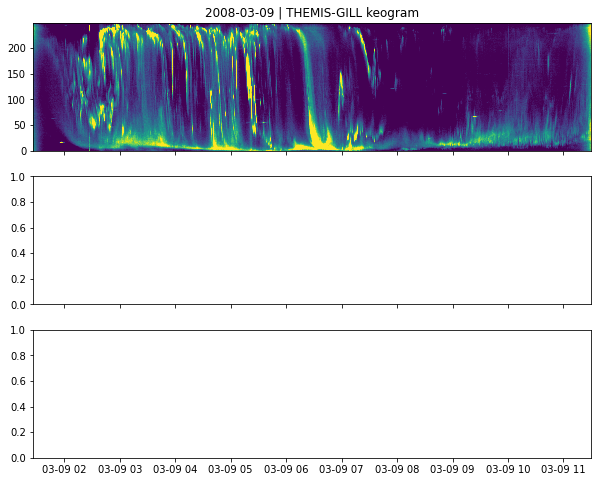

In [6]:
fontsize=11
fig, ax = plt.subplots(3, 1, figsize=(10, 8), sharex=True)
time_range = (datetime(2008, 3, 9), datetime(2008, 3, 10))
asilib.plot_keogram('THEMIS', 'GILL', time_range, ax=ax[0])
asilib.plot_keogram('THEMIS', 'GILL', time_range, ax=ax[1], map_alt=map_alt_km)
asilib.plot_keogram('THEMIS', 'GILL', time_range, ax=ax[2], map_alt=map_alt_km, aacgm=True)
ax[-1].set_xlabel('Time', fontsize=fontsize)
ax[0].set_ylabel('Pixel index', fontsize=fontsize)
ax[1].set_ylabel('Geographic latitude [deg]', fontsize=fontsize)
ax[2].set_ylabel('Magnetic latitude [deg]', fontsize=fontsize)

fmtr = dates.DateFormatter("%H:%M")
ax[-1].xaxis.set_major_formatter(fmtr)
ax[1].set_title('')
ax[2].set_title('')
ax[0].text(0, 1, f'(A) Unmapped', va='top', transform=ax[0].transAxes, 
    color='white', fontsize=fontsize+4, weight='bold')
ax[1].text(0, 1, f'(B) Mapped to {map_alt_km} km | geographic', va='top', transform=ax[1].transAxes, 
    color='white', fontsize=fontsize+4, weight='bold')
ax[2].text(0, 1, f'(C) Mapped to {map_alt_km} km | magnetic', va='top', transform=ax[2].transAxes, 
    color='white', fontsize=fontsize+4, weight='bold')
plt.savefig('figures/fig3.jpg', dpi=300)

In [ ]:
time_range = (datetime(2008, 3, 9, 4, 35), datetime(2008, 3, 9, 4, 50))
asilib.animate_fisheye('THEMIS', 'GILL', time_range, overwrite=True)

# Figure 4

A conjunction montage. Lets take this one step at a time. First we define the ASI info and load the skymap file (to make the fictional satellite path overhead).

In [ ]:
asi_array_code = 'THEMIS'
location_code = 'RANK'
area_box_km = (20, 20)
time_range = (datetime(2017, 9, 15, 2, 32, 0), datetime(2017, 9, 15, 2, 35, 0))

In [ ]:

skymap_dict = asilib.load_skymap(asi_array_code, location_code, time_range[0])

Create the satellite path (time, latitude, longitude, altitude) at a 500 km altitude. It is a north-south satellite track oriented to the east of the imager.

In [ ]:
n = int((time_range[1] - time_range[0]).total_seconds() / 3)  #  3 second cadence.
time = np.array([time_range[0] + timedelta(seconds=i*3) for i in range(n)])
lats = np.linspace(skymap_dict["SITE_MAP_LATITUDE"] + 2, skymap_dict["SITE_MAP_LATITUDE"] - 3, n)
lons = (skymap_dict["SITE_MAP_LONGITUDE"] - 0.25) * np.ones(n)
alts = 500 * np.ones(n)
time_lla_500km = np.array([time, lats, lons, alts]).T

Map the satellite's altitude from 500 km to the 110 km footprint. Time is necessary to correctly evaluate the magnetic field model. 

**NOTE** You will need to install [IRBEM](https://github.com/PRBEM/IRBEM) for the following line to run.

In [ ]:
lla_110km = asilib.lla2footprint(time_lla_500km, 110)

Next, map the satellite's footprint to the imager's (Azimuth, Elevation), i.e. AzEl coordinates.

In [ ]:
sat_azel, sat_azel_pixels = asilib.lla2azel(asi_array_code, location_code, time_range[0], lla_110km)

The last step before we make the movie is to calculate what pixels are in a box_km around the satellite, to convolve it with the images to pick out the ASI intensity in that box.

In [ ]:
area_box_mask = asilib.equal_area(
    asi_array_code, location_code, time_range[0], lla_110km, box_km=area_box_km
)

Calculate the mean ASI intensity in the area_box_km

In [ ]:
times, images = asilib.load_image(asi_array_code, location_code, time_range=time_range)
asi_brightness = np.nanmean(images * area_box_mask, axis=(1, 2))
area_box_mask[np.isnan(area_box_mask)] = 0  # To play nice with plt.contour()

Plot preparation

In [ ]:
num_images = 4

delta_time_s = int((time_range[1]-time_range[0]).total_seconds()/num_images)
montage_times = [time_range[0]+timedelta(seconds=i*delta_time_s) for i in range(num_images)]
formatted_times = [t.strftime('%H:%M:%S') for t in montage_times]
subplot_labels = [f'({l}) {t}' for l, t in zip(string.ascii_uppercase[:num_images], formatted_times)]

downsampled_satellite_indices = np.zeros(num_images)
for i, montage_time in enumerate(montage_times):
    downsampled_satellite_indices[i] = np.where(time == montage_time)[0][0]

In [ ]:
fig = plt.figure(figsize=(12, 5))

gs = GridSpec(3, num_images, figure=fig)
ax = [fig.add_subplot(gs[:2, n]) for n in range(num_images)]
bx = fig.add_subplot(gs[-1, :])

for i, (montage_time, ax_i, subplot_label) in enumerate(zip(montage_times, ax, subplot_labels)):
    asilib.plot_fisheye(asi_array_code, location_code, montage_time, ax=ax_i, label=False)
    ax_i.axis('off')

    index = int(downsampled_satellite_indices[i])
    ax_i.plot(sat_azel_pixels[:, 0], sat_azel_pixels[:, 1], 'red', alpha=0.5)
    ax_i.scatter(sat_azel_pixels[index, 0], sat_azel_pixels[index, 1], c='red', marker='o', s=50)
    ax_i.contour(area_box_mask[index, :, :], levels=[0.99], colors=['yellow'])

    # # Plot the time series of the mean ASI intensity along the satellite path
    # ax[1].plot(image_data.time, asi_brightness)
    # ax[1].axvline(time, c='b')
    ax_i.text(0, 1, subplot_label, va='top', transform=ax_i.transAxes, color='white', fontsize=20)

bx.plot(time, asi_brightness/1000, c='k')
bx.text(0, 1, f'({string.ascii_lowercase[num_images]})', va='top', transform=bx.transAxes, fontsize=20)
bx.set_ylabel(r'Mean ASI counts $\times 10^3$')
bx.set_xlabel('Time')

plt.tight_layout()
plt.savefig('figures/fig4.jpg', dpi=300)

# Movie S2
Now to make the conjunction movie. 

In [ ]:
fig, ax = plt.subplots(
    2, 1, figsize=(7, 8.5), gridspec_kw={'height_ratios': [4, 1]}
)

# Initiate the movie generator function. Any errors with the data will be raised here.
movie_generator = asilib.animate_fisheye_generator(
    asi_array_code, location_code, time_range, azel_contours=True, overwrite=True, ax=ax[0]
)

# Use the generator to get the images and time stamps to estimate mean the ASI
# brightness along the satellite path and in a (20x20 km) box.
image_data = movie_generator.send('data')

area_box_mask_2 = asilib.equal_area(
    asi_array_code, location_code, time_range[0], lla_110km, box_km=area_box_km
)

asi_brightness_2 = np.nanmean(image_data.images * area_box_mask_2, axis=(1, 2))
area_box_mask_2[np.isnan(area_box_mask_2)] = 0  # To play nice with plt.contour()

for i, (time, image, _, im) in enumerate(movie_generator):
    # Note that because we are drawing different data in each frame (a unique ASI
    # image in ax[0] and the ASI time series + a guide in ax[1], we need
    # to redraw everything at every iteration.

    # ax[1].clear()  # ax[0] cleared by asilib.animate_fisheye_generator()
    # Plot the entire satellite track, its current location, and a 20x20 km box
    # around its location.
    ax[0].plot(sat_azel_pixels[:, 0], sat_azel_pixels[:, 1], 'red')
    ax[0].scatter(sat_azel_pixels[i, 0], sat_azel_pixels[i, 1], c='red', marker='o', s=50)
    ax[0].contour(area_box_mask_2[i, :, :], levels=[0.99], colors=['yellow'])

    # Plot the time series of the mean ASI intensity along the satellite path
    # Draw the lines once and next time only update the vertical line at time.
    if 'vline' not in locals():
        vline = ax[1].axvline(time, c='b')
        ax[1].set(xlabel='Time', ylabel=f'Mean ASI intensity\n [counts$\times 10^3$]')
        ax[1].text(0, 1, '(b)', va='top', transform=ax[1].transAxes, color='black', fontsize=20)
    else:
        vline.set_xdata([time, time])

    # Annotate the location_code and satellite info in the top-left corner.
    ax[0].text(0, 1, '(a)', va='top', transform=ax[0].transAxes, color='white', fontsize=20)

    ax[1].plot(image_data.time, asi_brightness_2/1000,'k')
    
    
    plt.subplots_adjust(wspace=0, hspace=0, right=0.98, left=0.12, bottom=0.05, top=0.99)

print(f'Movie saved in {asilib.config["ASI_DATA_DIR"] / "movies"}')
